In [2]:
# Import libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


## Load the data

In [3]:
# Only need to do this once!
# Read in the data from excel and write out to csv
# Get excel file DataForTable2.1.xls from here:
# https://worldhappiness.report/ed/2024/#appendices-and-data
# df = pd.read_excel('../data/world-happiness/DataForTable2.1.xls')
# df.to_csv('../data/world-happiness/world_happiness.csv', index=False)
# df.head()

In [4]:
# Load the dataset reference into a Pandas dataframe
df_happiness_ref = pd.read_csv('../data/world-happiness/world_happiness_reference.csv')

# Review the dataset reference
df_happiness_ref.style.set_properties(subset=['Description'], **{'width': '350px'}, **{'text-align': 'left'})

,Variable,Description
0,country,Name of the country.
1,year,"Survey year, ranging from 2005-2018."
2,happiness,A happiness ranking on a scale of 0 to 10.
3,wealth,"Log GDP per capita, which indicates the wealth of the country."
4,support,A value that indicates how many people have family and friends that they can rely on.
5,health,Healthy life expectancy at birth.
6,freedom,Satisfaction with individual freedom to make life choices.
7,generosity,Measure of how likely people are to donate to charity.
8,corruption,Measure of national corruption
9,positivity,"Average of measures for happiness, laugh and enjoyment."


In [5]:
# Read in the data from csv
# See class materials from 7.1.1
df_happiness = pd.read_csv('../data/world-happiness/world_happiness.csv')
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


## Rename columns

In [6]:
# Rename columns
cols = {
    'Country name':'country', 
    'Life Ladder':'happiness',
    'Log GDP per capita':'wealth',
    'Social support':'support',
    'Healthy life expectancy at birth':'health',
    'Freedom to make life choices':'freedom',
    'Generosity':'generosity',
    'Perceptions of corruption':'corruption',
    'Positive affect':'positivity',
    'Negative affect':'negativity'
}
df_happiness = df_happiness.rename(columns=cols)


In [7]:
df_happiness.head(20)

,country,year,happiness,wealth,support,health,freedom,generosity,corruption,positivity,negativity
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
5,Afghanistan,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.059246,0.823204,0.547417,0.273328
6,Afghanistan,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.102330,0.871242,0.491641,0.374861
7,Afghanistan,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.078218,0.880638,0.491410,0.339276
8,Afghanistan,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.040480,0.793246,0.501409,0.348332
9,Afghanistan,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.122848,0.954393,0.435270,0.371326


In [7]:
# Get list of unique countries
country_list = df_happiness['country'].unique()
print(country_list)
print(len(country_list))

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg'
 'Madagascar' 'Malawi' 'M

## Explore Column Value Distributions by Country

In [8]:
# Get averages by country
df_country = df_happiness.drop(columns=['year']).groupby('country').mean()

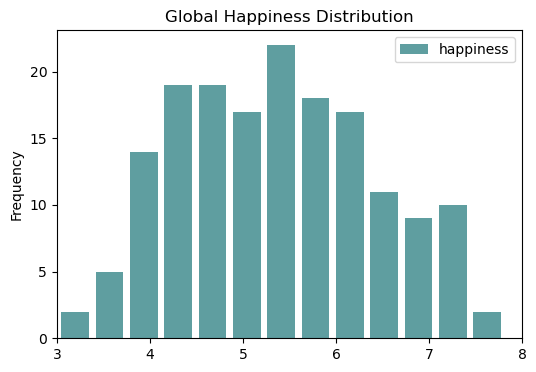

In [9]:
# Plot the distribution of happiness in the dataset
happiness_dist = df_country.plot.hist(column=['happiness'],bins=200,xlim=(3,8), width=0.3, figsize=(6,4),
                                         title='Global Happiness Distribution', color='cadetblue')

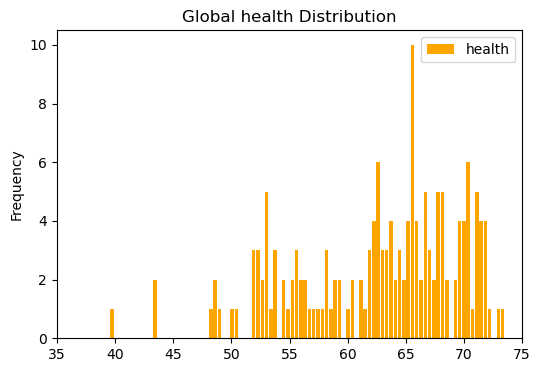

In [10]:
# Plot the distribution of health in the dataset
health_dist = df_country.plot.hist(column=['health'],bins=200,xlim=(35,75), width=0.3, figsize=(6,4),
                                         title='Global health Distribution', color='orange')

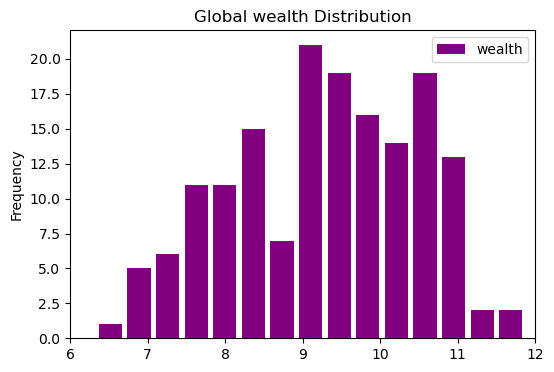

In [11]:
# Plot the distribution of wealth in the dataset
wealth_dist = df_country.plot.hist(column=['wealth'],bins=200,xlim=(6,12), width=0.3, figsize=(6,4),
                                         title='Global wealth Distribution', color='purple')

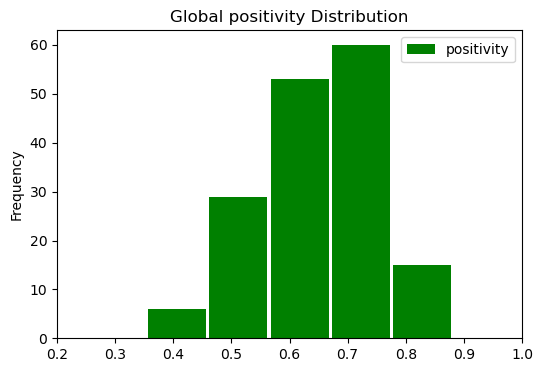

In [12]:
# Plot the distribution of positivity in the dataset
positivity_dist = df_country.plot.hist(column=['positivity'],bins=700,xlim=(0.2,1), width=0.1, figsize=(6,4),
                                         title='Global positivity Distribution', color='green')

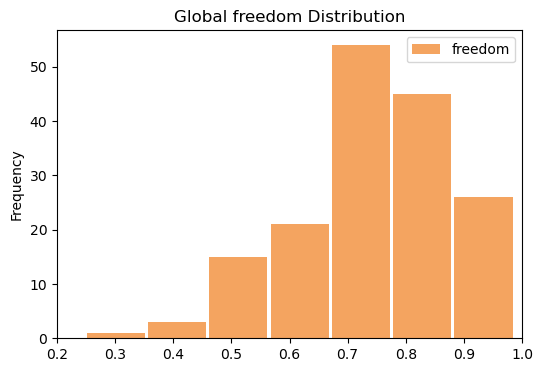

In [13]:
# Plot the distribution of freedom in the dataset
freedom_dist = df_country.plot.hist(column=['freedom'],bins=700,xlim=(0.2,1), width=0.1, figsize=(6,4),
                                         title='Global freedom Distribution', color='sandybrown')

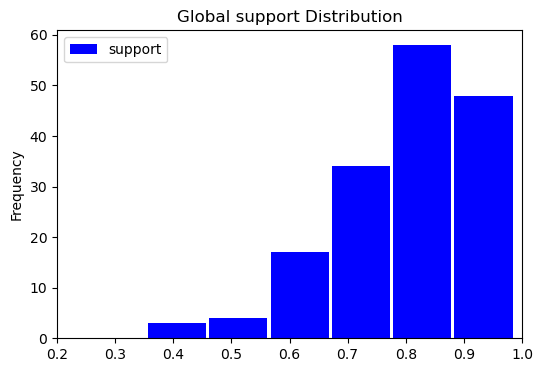

In [14]:
# Plot the distribution of support in the dataset
support_dist = df_country.plot.hist(column=['support'],bins=700,xlim=(0.2,1), width=0.1, figsize=(6,4),
                                         title='Global support Distribution', color='blue')

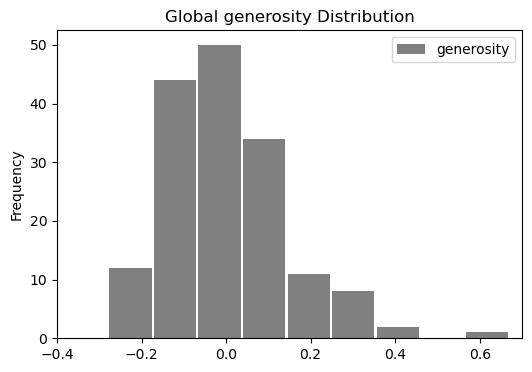

In [15]:
# Plot the distribution of generosity in the dataset
generosity_dist = df_country.plot.hist(column=['generosity'],bins=700,xlim=(-0.4,0.7), width=0.1, figsize=(6,4),
                                         title='Global generosity Distribution', color='grey')

## Explore Relationships with Scatter Plots

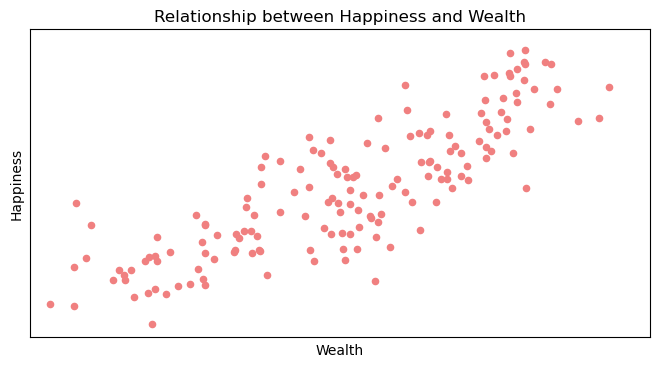

In [16]:
# Scatterplot of wealth and happiness
wealth_happiness = df_country.plot.scatter(x="wealth",y="happiness",title="Relationship between Happiness and Wealth", figsize=(8,4),
                                           xlabel="Wealth",ylabel="Happiness",color="lightcoral",
                                          xlim=(6.5,12),ylim=(3,8),xticks=(),yticks=())

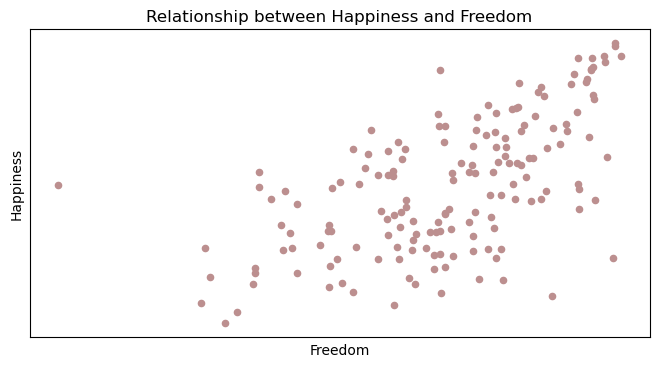

In [17]:
# Scatterplot of happiness and freedom
freedom_happiness = df_country.plot.scatter(x="freedom",y="happiness",title="Relationship between Happiness and Freedom", figsize=(8,4),
                                           xlabel="Freedom",ylabel="Happiness",color="rosybrown",
                                           xticks=(),yticks=())

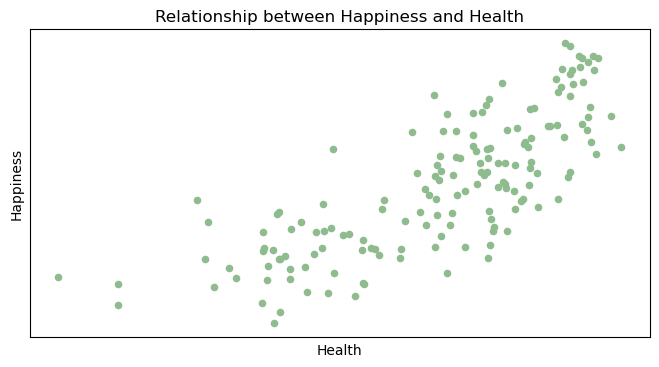

In [18]:
# Scatterplot of happiness and health
health_happiness = df_country.plot.scatter(x="health",y="happiness",title="Relationship between Happiness and Health", figsize=(8,4),
                                           xlabel="Health",ylabel="Happiness",color="darkseagreen",
                                           xticks=(),yticks=())

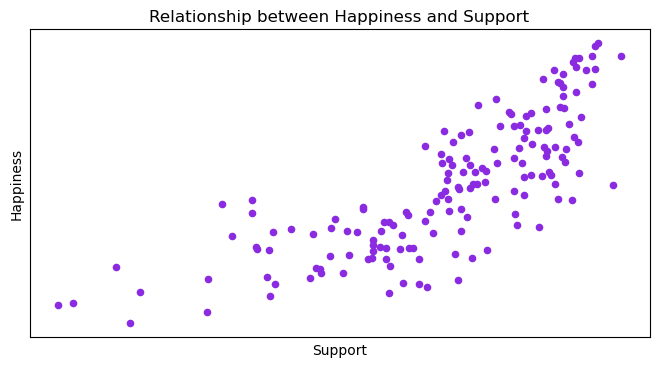

In [19]:
# Scatterplot of happiness and support
support_happiness = df_country.plot.scatter(x="support",y="happiness",title="Relationship between Happiness and Support", figsize=(8,4),
                                           xlabel="Support",ylabel="Happiness",color="blueviolet",
                                           xticks=(),yticks=())

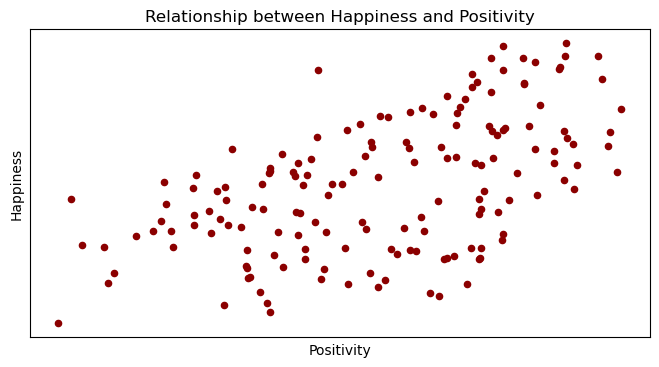

In [20]:
# Scatterplot of happiness and positivity
positivity_happiness = df_country.plot.scatter(x="positivity",y="happiness",title="Relationship between Happiness and Positivity", figsize=(8,4),
                                           xlabel="Positivity",ylabel="Happiness",color="darkred",
                                           xticks=(),yticks=())

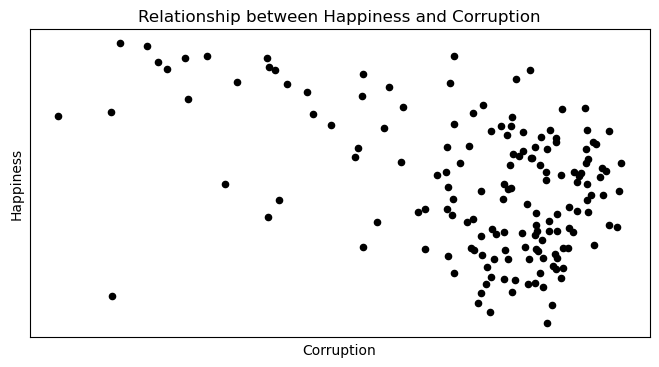

In [21]:
# Scatterplot of happiness and corruption
corruption_happiness = df_country.plot.scatter(x="corruption",y="happiness",title="Relationship between Happiness and Corruption", figsize=(8,4),
                                           xlabel="Corruption",ylabel="Happiness",color="black",
                                           xticks=(),yticks=())